In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify
import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_excel('ecommerce retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
print('DataFrame Dimension:', data.shape)

DataFrame Dimension: (541909, 8)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#Drop null values of CustomerID and duplicate rows:
data = data.dropna(subset=['CustomerID'], axis=0).drop_duplicates()
print('DataFrame Dimension after dropping:', data.shape)

#Convert some columns to correct datatype:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(int)

DataFrame Dimension after dropping: (401604, 8)


In [6]:
# Calculate 'Loss' of the orders which was cancelled:
cancelled = data[data['Quantity']<0]
cancelled['Loss'] = cancelled['Quantity']*cancelled['UnitPrice']
cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Loss
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


In [7]:
# Calculate Total Loss group by InvoiceNo, Country and CustomerID:
agg_cancelled = cancelled.groupby(['InvoiceNo','Country','CustomerID']).agg({'InvoiceDate':'max','Loss':'sum'}).reset_index()
agg_cancelled

,InvoiceNo,Country,CustomerID,InvoiceDate,Loss
0,C536379,United Kingdom,14527,2010-12-01 09:41:00,-27.50
1,C536383,United Kingdom,15311,2010-12-01 09:49:00,-4.65
2,C536391,United Kingdom,17548,2010-12-01 10:24:00,-141.48
3,C536506,United Kingdom,17897,2010-12-01 12:38:00,-25.50
4,C536543,United Kingdom,17841,2010-12-01 14:30:00,-3.80
...,...,...,...,...,...
3649,C581484,United Kingdom,16446,2011-12-09 09:27:00,-168469.60
3650,C581490,United Kingdom,14397,2011-12-09 09:57:00,-32.53
3651,C581499,United Kingdom,15498,2011-12-09 10:28:00,-224.69
3652,C581568,United Kingdom,15311,2011-12-09 11:57:00,-54.75


In [8]:
# Calculate 'Revenue' of the ordered was delivered:
delivered = data[data['Quantity']>=0]
delivered['Revenue'] = delivered['Quantity']*delivered['UnitPrice']
delivered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [9]:
# Calculate Total Loss group by InvoiceNo, Country and CustomerID:
agg_delivered = delivered.groupby(['InvoiceNo','Country','CustomerID']).agg({'InvoiceDate':'max','Revenue':'sum'}).reset_index()
agg_delivered

,InvoiceNo,Country,CustomerID,InvoiceDate,Revenue
0,536365,United Kingdom,17850,2010-12-01 08:26:00,139.12
1,536366,United Kingdom,17850,2010-12-01 08:28:00,22.20
2,536367,United Kingdom,13047,2010-12-01 08:34:00,278.73
3,536368,United Kingdom,13047,2010-12-01 08:34:00,70.05
4,536369,United Kingdom,13047,2010-12-01 08:35:00,17.85
...,...,...,...,...,...
18531,581583,United Kingdom,13777,2011-12-09 12:23:00,124.60
18532,581584,United Kingdom,13777,2011-12-09 12:25:00,140.64
18533,581585,United Kingdom,15804,2011-12-09 12:31:00,329.05
18534,581586,United Kingdom,13113,2011-12-09 12:49:00,339.20


In [10]:
# Tính Recency
day = '2011-12-31'
day = pd.to_datetime(day)
recency = data.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = recency['LastPurchaseDate'].max()
recency['Recency'] = recency['LastPurchaseDate'].apply(lambda x: (day - x).days)
recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18 10:17:00,346
1,12347,2011-12-07 15:52:00,23
2,12348,2011-09-25 13:13:00,96
3,12349,2011-11-21 09:51:00,39
4,12350,2011-02-02 16:01:00,331


In [11]:
# Tính Frequency
frequency = delivered.drop_duplicates().groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].nunique()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [12]:
# Tính Moneytary
monetary = delivered.groupby(by='CustomerID', as_index=False)['Revenue'].sum()
monetary.columns = ['CustomerID', 'Monetary']
monetary.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [13]:
RF = recency.merge(frequency, on='CustomerID')
RFM = RF.merge(monetary, on='CustomerID').drop(columns='LastPurchaseDate')
RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,346,1,77183.60
1,12347,23,7,4310.00
2,12348,96,4,1797.24
3,12349,39,1,1757.55
4,12350,331,1,334.40


In [14]:
quintiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 32.0, 0.4: 52.0, 0.6: 91.0, 0.8: 196.4000000000001},
 'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 6.0},
 'Monetary': {0.2: 248.84400000000002,
  0.4: 487.118,
  0.6: 933.2019999999999,
  0.8: 2054.82}}

In [15]:
# Tính R Score
def R_Score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1
    
# Tính F Score và M Score
def FM_Score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5
    
RFM['R Score'] = RFM['Recency'].apply(lambda x: R_Score(x))
RFM['F Score'] = RFM['Frequency'].apply(lambda x: FM_Score(x, 'Frequency'))
RFM['M Score'] = RFM['Monetary'].apply(lambda x: FM_Score(x, 'Monetary'))

In [40]:
RFM['RFM_Score'] = RFM['R Score'].map(str) + RFM['F Score'].map(str) + RFM['M Score'].map(str)
RFM['RFM_Score'] = RFM['RFM_Score'].astype(int)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM_Score
0,12346,346,1,77183.60,1,1,5,115
1,12347,23,7,4310.00,5,5,5,555
2,12348,96,4,1797.24,2,4,4,244
3,12349,39,1,1757.55,4,1,4,414
4,12350,331,1,334.40,1,1,2,112


In [41]:
segments = pd.read_excel('ecommerce retail.xlsx', sheet_name='Segmentation')
segments.columns = [col.replace(' ','_') for col in segments.columns]
segments['RFM_Score'].astype(str)
segments

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [42]:
# Convert comma-seperated string to a list of RFM scores
segments['RFM_Score'] = segments['RFM_Score'].str.split(',')
segments = segments.explode('RFM_Score').reset_index(drop=True)
segments['RFM_Score'] = segments['RFM_Score'].astype(int)
segments.sort_values(by='RFM_Score')
segments

,Segment,RFM_Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [43]:
join_data = RFM.merge(segments, how='left', on='RFM_Score')
join_data

,CustomerID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM_Score,Segment
0,12346,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347,23,7,4310.00,5,5,5,555,Champions
2,12348,96,4,1797.24,2,4,4,244,At Risk
3,12349,39,1,1757.55,4,1,4,414,Promising
4,12350,331,1,334.40,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4334,18280,298,1,180.60,1,1,1,111,Lost customers
4335,18281,201,1,80.82,1,1,1,111,Lost customers
4336,18282,28,2,178.05,5,2,1,521,Promising
4337,18283,24,16,2045.53,5,5,4,554,Champions


In [44]:
# Calculate the number of customers, total monetary and average recency of each segmentation:
group = join_data.groupby('Segment').agg({'CustomerID':'count','Monetary':'sum','Recency':'mean'}).reset_index()
group.columns = ['Segment','Customer_count','Total_Monetary','Avg_Recency']
group.sort_values(by='Customer_count', ascending=False, inplace=True)
group

,Segment,Customer_count,Total_Monetary,Avg_Recency
3,Champions,810,5553733.870,30.785185
4,Hibernating customers,656,262027.812,153.724085
5,Lost customers,567,124537.710,295.749559
8,New Customers,414,92670.620,49.338164
6,Loyal,385,938254.160,56.496104
1,At Risk,347,686394.931,153.757925
9,Potential Loyalist,304,192785.540,50.809211
7,Need Attention,254,322785.801,51.696850
10,Promising,249,386883.720,40.827309
0,About To Sleep,223,85089.440,98.461883


In [45]:
# Calculate the number of customers and total monetary proportion:
group['Customer_share'] = group['Customer_count'] / group['Customer_count'].sum()
group['Monetary_share'] = group['Total_Monetary'] / group['Total_Monetary'].sum()
group

,Segment,Customer_count,Total_Monetary,Avg_Recency,Customer_share,Monetary_share
3,Champions,810,5553733.870,30.785185,0.186679,0.624913
4,Hibernating customers,656,262027.812,153.724085,0.151187,0.029484
5,Lost customers,567,124537.710,295.749559,0.130675,0.014013
8,New Customers,414,92670.620,49.338164,0.095414,0.010427
6,Loyal,385,938254.160,56.496104,0.088730,0.105574
1,At Risk,347,686394.931,153.757925,0.079972,0.077234
9,Potential Loyalist,304,192785.540,50.809211,0.070062,0.021692
7,Need Attention,254,322785.801,51.696850,0.058539,0.036320
10,Promising,249,386883.720,40.827309,0.057386,0.043533
0,About To Sleep,223,85089.440,98.461883,0.051394,0.009574


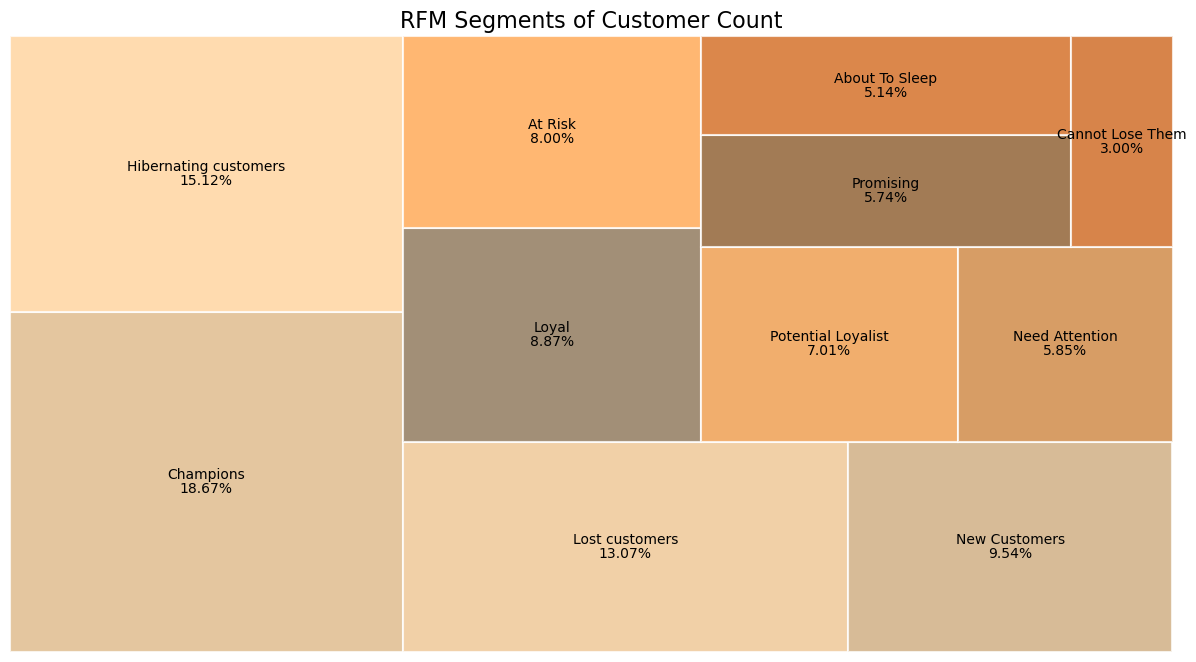

In [46]:
# Visualization RFM segments of Customer share:
colors = ['#DEB887','#FFD39B','#EEC591','#CDAA7D','#8B7355','#FFA54F','#EE9A49','#CD853F','#8B5A2B','#D2691E','#CD661D']
fix, ax = plt.subplots(1, figsize=(15,8))
squarify.plot(sizes=group['Customer_count'],
             label=group['Segment'],
             value=[f'{x*100:.2f}%' for x in group['Customer_share']],
             alpha=.8,
             color=colors,
             bar_kwargs=dict(linewidth=1.5, edgecolor='white'))
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

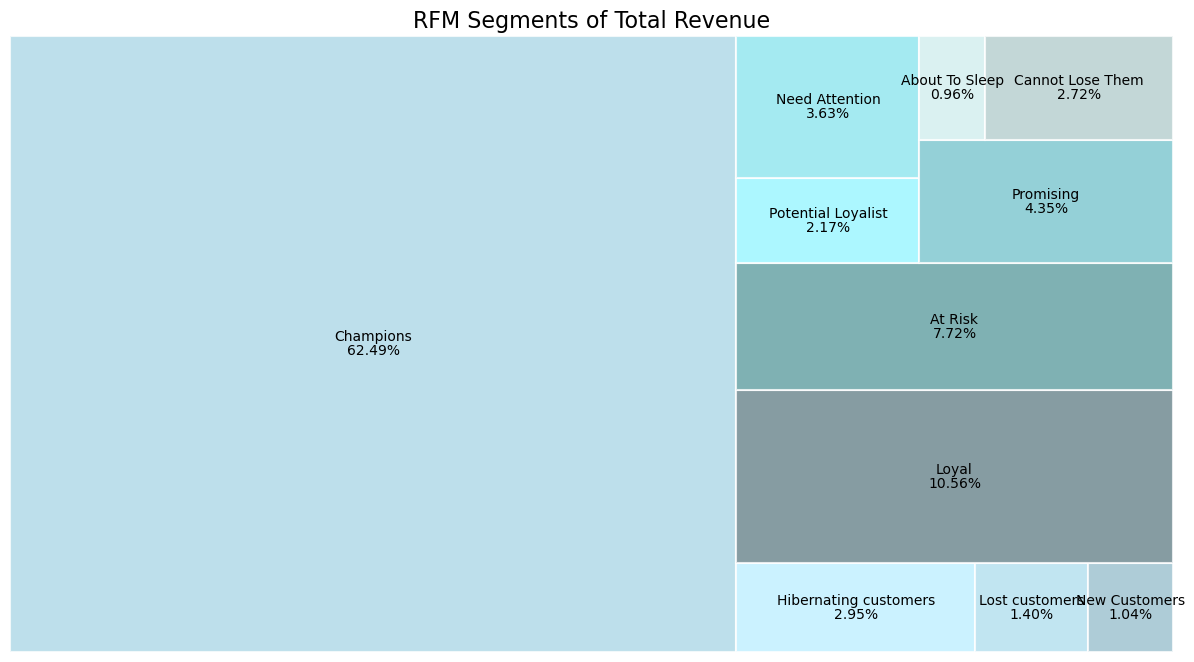

In [47]:
# Visualization RFM segments of Total Monetary:
colors = ['#ADD8E6','#BFEFFF','#B2DFEE','#9AC0CD','#68838B','#5F9EA0','#98F5FF','#8EE5EE','#7AC5CD','#D1EEEE','#B4CDCD']
fix, ax = plt.subplots(1, figsize=(15,8))
squarify.plot(sizes=group['Total_Monetary'],
             label=group['Segment'],
             value=[f'{x*100:.2f}%' for x in group['Monetary_share']],
             alpha=.8,
             color=colors,
             bar_kwargs=dict(linewidth=1.5, edgecolor='white'))
plt.title('RFM Segments of Total Revenue', fontsize=16)
plt.axis('off')
plt.show()

# Insights:
RFM segments by number of customers:
- The Champions group accounts for the largest proportion of 18.67%.
- The two groups Hibernating and Lost Customers also account for a large proportion, 15.12% and 13.07% respectively.

RFM segments by revenue:
- Because the Champions group accounts for the largest proportion, the revenue from this group is also the highest: 62.49%.

# Recommendations:
- Champions: Reward them. Can be early adopters for new products. This will be a group help to promote the company.
- Loyal: Upsell higher value products. Ask for reviews. Engage them. 
- Potential Loyalists: Offer membership / loyalty program, recommend other products. 
- New customers: Provide on-boarding support, give them early success, start building relationship. 
- Promising: Create brand awareness, offer free trials.
- Need attention: Make limited time offers, Recommend based on past purchases. Reactivate them. 
- About to sleep: Share valuable resources, recommend popular products / renewals at discount, reconnect with them. 
- At risk: Send personalized emails to reconnect, offer renewals, provide helpful resources. 
- Cannot lose them: Win them back via renewals or newer products, don’t lose them to competition, talk to them. 
- Hibernating customers: Offer other relevant products and special discounts. Recreate brand value. 
- Lost customers: Revive interest with reach out campaign, ignore otherwise. 